# Adult Income Model

## Introduction
This notebook uses an income dataset was from the 1994 U.S. Census database.

**Source:**
 -  [Kaggle data set](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset)
 
 This notebook includes some lines of code adapted from:
 -  [Kaggle code](https://www.kaggle.com/code/jieyima/income-classification-model)

**Objective:**
- This notebook covers a classification, machine learning problem where we will ascertain **whether or not a person makes over 50K a year** or not given their demographical information.

## Imports

In [965]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import math

# Warnings
import warnings
warnings.filterwarnings("ignore")

In [966]:
df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [967]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [968]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


**NOTE:**
- For more information on the meaning of the fields, see [here](http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html).

## Data Cleaning

In [969]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

**NOTE:**
- No missing values.

In [970]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [971]:
df.income.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [972]:
df["predclass"] = df["income"]
df.drop("income",axis=1,inplace=True)

In [973]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  predclass        48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Feature Break Down

In [974]:
cat_columns = df.select_dtypes(exclude="number").columns

for i, column in enumerate(cat_columns):
    print(i,".) ",column," --> ", df[column].unique(),"\n")

0 .)  workclass  -->  ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

1 .)  education  -->  ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool'] 

2 .)  marital-status  -->  ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse'] 

3 .)  occupation  -->  ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces'] 

4 .)  relationship  -->  ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative'] 

5 .)  race  -->  ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo'] 

6 .)  gender  -->  ['Male' 'Female'] 

7 .)  native-country  

### Predclass

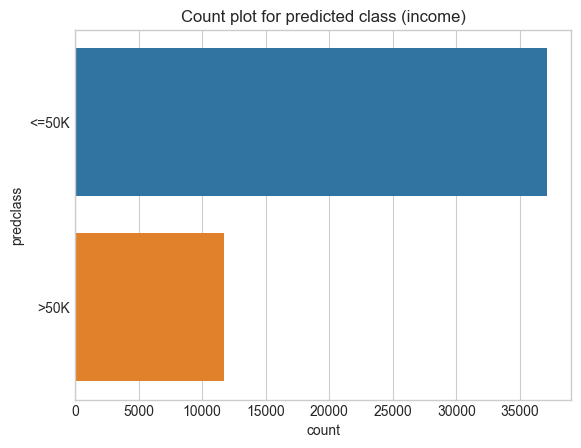

In [975]:
fig = plt.figure()
sns.countplot(y="predclass",data=df)
plt.title("Count plot for predicted class (income)")
plt.show()

**NOTE:**
- Data categories are partially imbalanced.

### Education

In [976]:
df.education.value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [977]:
# Using bins to further categorize data
to_replace=["Preschool","1st-4th","5th-6th","7th-8th","9th","10th","11th","12th"]
df.education.replace(to_replace=to_replace,value="dropout",inplace=True)

to_replace=["HS-Grad","HS-grad"]
df.education.replace(to_replace=to_replace,value="HighGrad",inplace=True)

to_replace=["Some-college","Assoc-acdm","Assoc-voc"]
df.education.replace(to_replace=to_replace,value="CommunityCollege",inplace=True)

df["education"].replace("Prof-school", "Masters",inplace=True)

In [978]:
df.education.value_counts()

HighGrad            15784
CommunityCollege    14540
Bachelors            8025
dropout              6408
Masters              3491
Doctorate             594
Name: education, dtype: int64

In [979]:
df[["education","educational-num"]].groupby(["education"],as_index=False).mean().sort_values(by="educational-num",ascending=False)

,education,educational-num
2,Doctorate,16.000000
4,Masters,14.238900
0,Bachelors,13.000000
1,CommunityCollege,10.361967
3,HighGrad,9.000000
5,dropout,5.614544


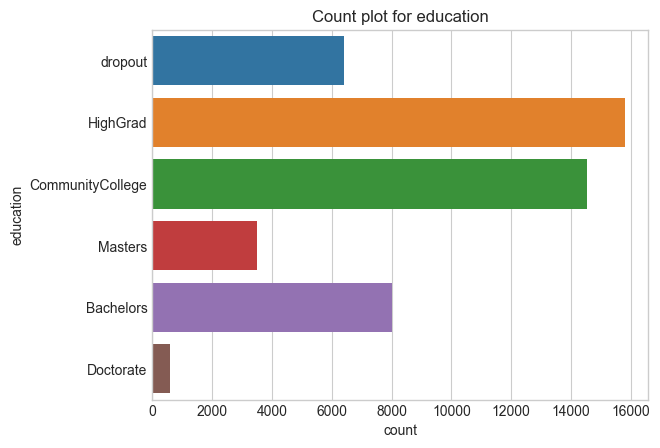

In [980]:
fig = plt.figure()
sns.countplot(y="education", data=df)
plt.title("Count plot for education")
plt.show()

### Marital-status

In [981]:
# Using bins to further categorize data
df["marital-status"].replace(["Never-married","Married-spouse-absent"],"NotMarried",inplace=True)
df["marital-status"].replace(["Married-AF-spouse","Married-civ-spouse"],"Married",inplace=True)
df["marital-status"].replace(["Separated","Divorced"], "Separated",inplace=True)

In [982]:
df["marital-status"].value_counts()

Married       22416
NotMarried    16745
Separated      8163
Widowed        1518
Name: marital-status, dtype: int64

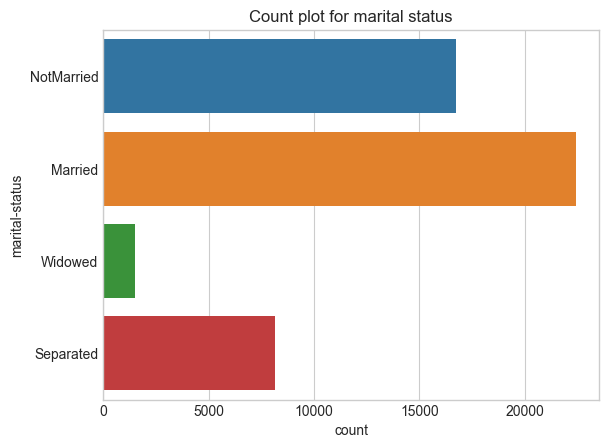

In [983]:
fig = plt.figure()
sns.countplot(y="marital-status", data=df)
plt.title("Count plot for marital status")
plt.show()

### Occupation

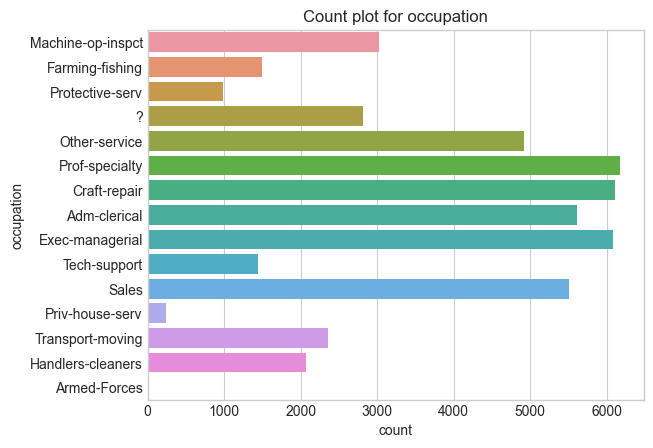

In [984]:
fig = plt.figure()
sns.countplot(y="occupation",data=df)
plt.title("Count plot for occupation")
plt.show()

### Workclass

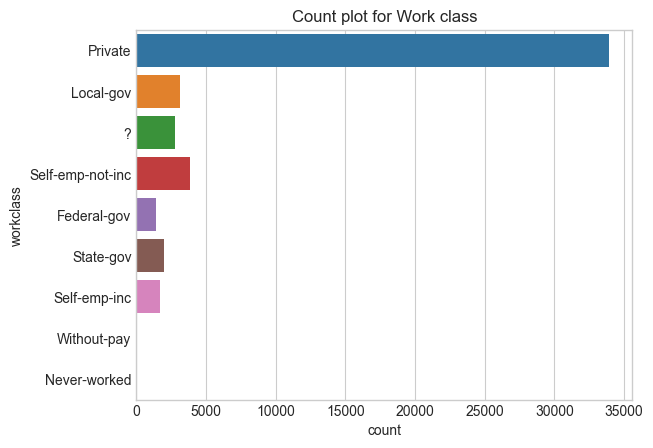

In [985]:
fig = plt.figure()
sns.countplot(y="workclass",data=df)
plt.title("Count plot for Work class")
plt.show()

### Age

In [986]:
# Using bins to further categorize data
df["age_bin"] = pd.cut(df["age"], 20)

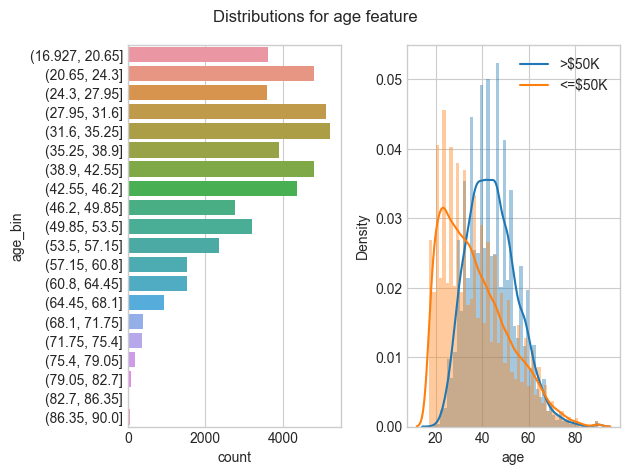

In [987]:
fig = plt.figure()

plt.subplot(1, 2, 1)
sns.countplot(y="age_bin", data=df)

plt.subplot(1, 2, 2)
sns.distplot(df[df["predclass"] == ">50K"]["age"], kde_kws={"label": ">$50K"})
sns.distplot(df[df["predclass"] == "<=50K"]["age"], kde_kws={"label": "<=$50K"})

plt.suptitle("Distributions for age feature")
plt.legend()
plt.tight_layout()
plt.show()

In [988]:
df[["predclass","age"]].groupby(["predclass"],as_index=False).mean().sort_values(by="age",ascending=False)

,predclass,age
1,>50K,44.275178
0,<=50K,36.872184


### Race

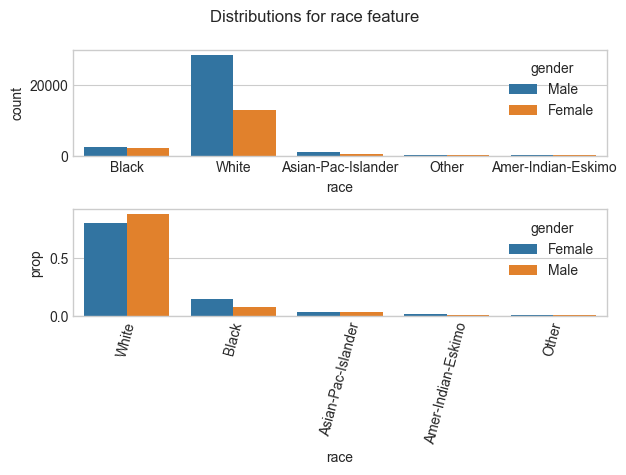

In [989]:
x, y, hue = "race", "prop", "gender"
f, axes = plt.subplots(2,1)
sns.countplot(x=x, hue=hue, data=df, ax=axes[0])
prop_df = (df[x].groupby(df[hue]).value_counts(normalize=True).rename(y).reset_index())
sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])
plt.xticks(rotation = 75)
plt.suptitle("Distributions for race feature")
plt.tight_layout()
plt.show()

### Hours of Work 

In [990]:
# Using bins to further categorize data
df["hours-per-week_bin"] = pd.cut(df["hours-per-week"], 10)

In [991]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   age                 48842 non-null  int64   
 1   workclass           48842 non-null  object  
 2   fnlwgt              48842 non-null  int64   
 3   education           48842 non-null  object  
 4   educational-num     48842 non-null  int64   
 5   marital-status      48842 non-null  object  
 6   occupation          48842 non-null  object  
 7   relationship        48842 non-null  object  
 8   race                48842 non-null  object  
 9   gender              48842 non-null  object  
 10  capital-gain        48842 non-null  int64   
 11  capital-loss        48842 non-null  int64   
 12  hours-per-week      48842 non-null  int64   
 13  native-country      48842 non-null  object  
 14  predclass           48842 non-null  object  
 15  age_bin             48842 non-null  

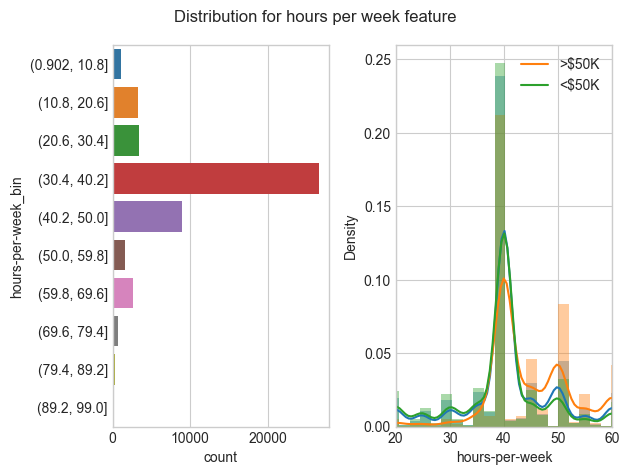

In [992]:
fig = plt.figure()

plt.subplot(1, 2, 1)
sns.countplot(y="hours-per-week_bin", data=df);

plt.subplot(1, 2, 2)
sns.distplot(df["hours-per-week"]);
sns.distplot(df[df["predclass"] == ">50K"]["hours-per-week"], kde_kws={"label": ">$50K"})
sns.distplot(df[df["predclass"] == "<=50K"]["hours-per-week"], kde_kws={"label": "<$50K"})

plt.ylim(0, None)
plt.xlim(20, 60)
plt.suptitle("Distribution for hours per week feature")
plt.legend()
plt.tight_layout()
plt.show()

## Exploratory Data Analysis

### Pair Plot

In [993]:
# # Pair plots of the data
# with plt.ioff():
#     fig = plt.figure()
#     pp = sns.pairplot(df, hue="predclass", palette="deep", size=3, diag_kind="kde", diag_kws=dict(shade=True),
#                   plot_kws=dict(s=20))
#     pp.set(xticklabels=[])
#     plt.savefig("pairplot.png")
#     plt.close(fig)

**Note:**
- This pairplot takes a significant amount of time to run so it was run once then saved as an image which is referenced in the output below.

**Output:**
![Pairplot](pairplot.png)

### Correlation Heatmap

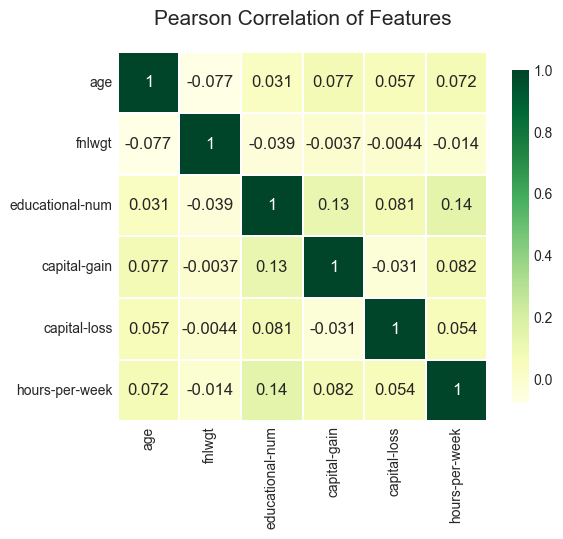

In [994]:
# # Correlation heatmap of the data
_ , ax = plt.subplots()
_ = sns.heatmap(df.corr(),cmap="YlGn",square=True,cbar_kws={"shrink":.9},ax=ax,annot=True,linewidths=0.1,vmax=1.0,
                linecolor="white",annot_kws={"fontsize":12})

plt.title("Pearson Correlation of Features", y=1.05, size=15)
plt.show()

### Bivariate Analysis

In [995]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   age                 48842 non-null  int64   
 1   workclass           48842 non-null  object  
 2   fnlwgt              48842 non-null  int64   
 3   education           48842 non-null  object  
 4   educational-num     48842 non-null  int64   
 5   marital-status      48842 non-null  object  
 6   occupation          48842 non-null  object  
 7   relationship        48842 non-null  object  
 8   race                48842 non-null  object  
 9   gender              48842 non-null  object  
 10  capital-gain        48842 non-null  int64   
 11  capital-loss        48842 non-null  int64   
 12  hours-per-week      48842 non-null  int64   
 13  native-country      48842 non-null  object  
 14  predclass           48842 non-null  object  
 15  age_bin             48842 non-null  

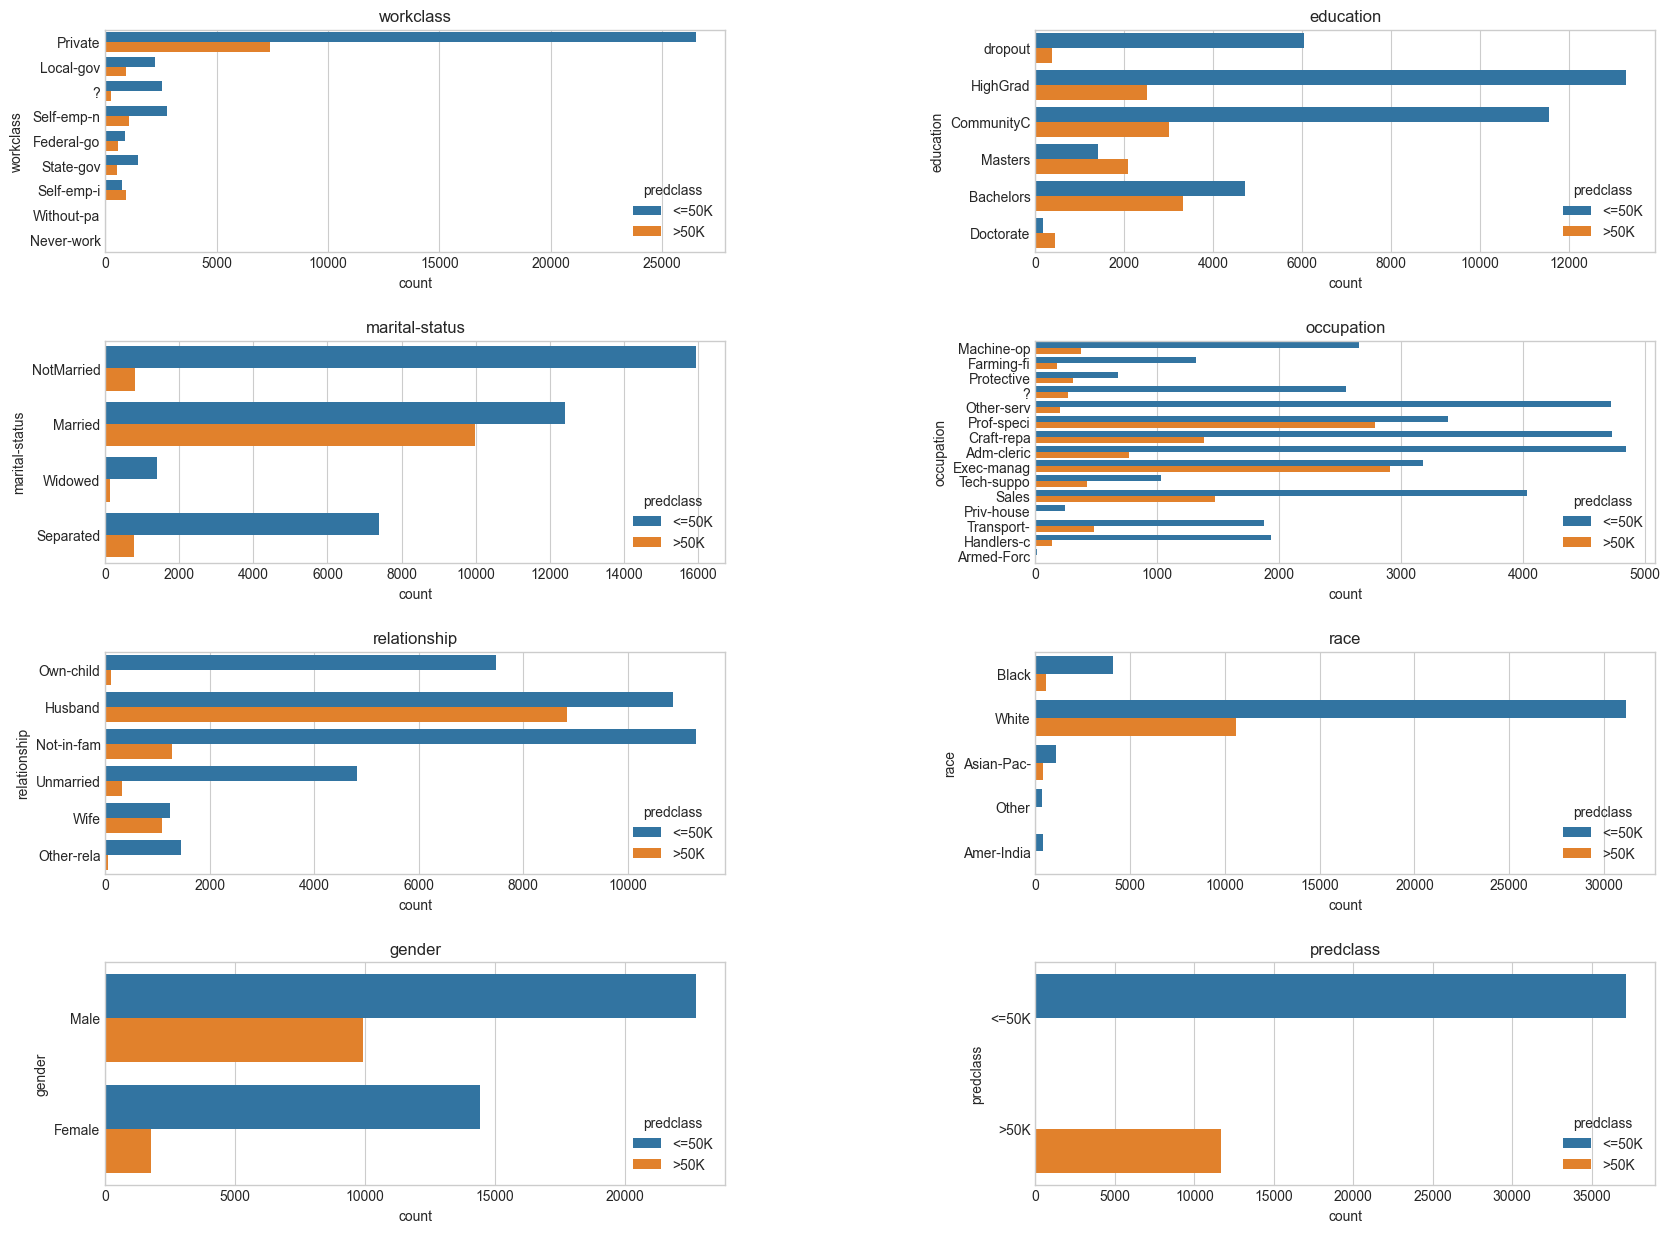

In [996]:
hue="predclass"
cols=2
width=20
height=15
hspace=0.4
wspace=0.5

dataset = df.loc[:,["workclass","education","marital-status","occupation",
                    "relationship","race","gender","predclass"]]

fig = plt.figure(figsize=(width,height))
fig.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=wspace,hspace=hspace)

rows = math.ceil(float(dataset.shape[1]) / cols)

for i, column in enumerate(dataset.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if dataset.dtypes[column]  == "object":
        g = sns.countplot(y=column, hue=hue, data=dataset)
        substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
        g.set(yticklabels=substrings)

plt.show()

### Occupation vs. Income

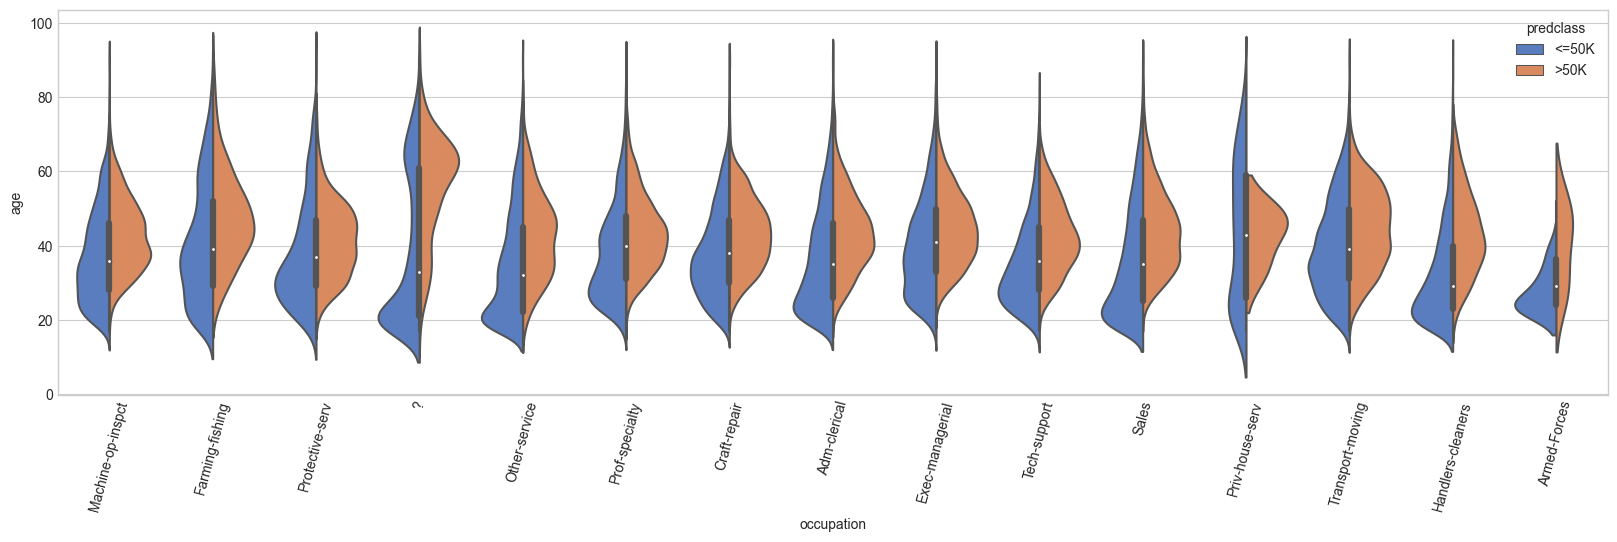

In [997]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="occupation",y="age",hue="predclass",data=df,gridsize=100,palette="muted",split=True,
                    saturation=0.75)

plt.xticks(rotation = 75)
plt.show()

### Race vs. Income

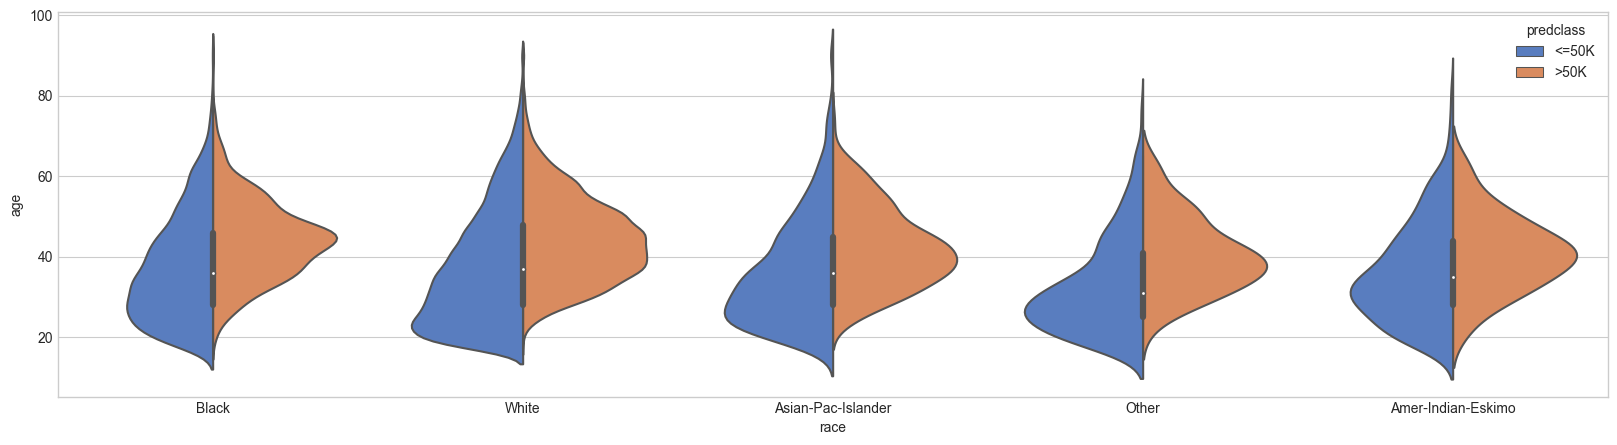

In [998]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="race",y="age",hue="predclass",data=df,gridsize=100,palette="muted",split=True,saturation=0.75)
plt.show()

## Building Machine Learning Models

### Imports

In [999]:
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score

from matplotlib import cm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import GridSearchCV

# ML packages
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Feature Selection and Encoding
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

### Feature Splitting

In [1000]:
df_old = df.copy()
df_old.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,predclass,age_bin,hours-per-week_bin
0,25,Private,226802,dropout,7,NotMarried,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,"(24.3, 27.95]","(30.4, 40.2]"
1,38,Private,89814,HighGrad,9,Married,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,"(35.25, 38.9]","(40.2, 50.0]"
2,28,Local-gov,336951,CommunityCollege,12,Married,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,"(27.95, 31.6]","(30.4, 40.2]"
3,44,Private,160323,CommunityCollege,10,Married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,"(42.55, 46.2]","(30.4, 40.2]"
4,18,?,103497,CommunityCollege,10,NotMarried,?,Own-child,White,Female,0,0,30,United-States,<=50K,"(16.927, 20.65]","(20.6, 30.4]"


In [1001]:
df = df.apply(LabelEncoder().fit_transform)
display(df.head())

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,predclass,age_bin,hours-per-week_bin
0,8,4,19329,5,6,1,7,3,2,1,0,0,39,39,0,2,3
1,21,4,4212,3,8,0,5,0,4,1,0,0,49,39,0,5,4
2,11,2,25340,1,11,0,11,0,4,1,0,0,39,39,1,3,3
3,27,4,11201,1,9,0,7,0,2,1,98,0,39,39,1,7,3
4,1,0,5411,1,9,1,0,3,4,0,0,0,29,39,0,0,2


In [1002]:
drop_elements = ["education","native-country","predclass","age_bin","hours-per-week_bin"]
X = df.drop(drop_elements,axis=1)
y = df["predclass"]

display(X.head())
display(y.head())

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week
0,8,4,19329,6,1,7,3,2,1,0,0,39
1,21,4,4212,8,0,5,0,4,1,0,0,49
2,11,2,25340,11,0,11,0,4,1,0,0,39
3,27,4,11201,9,0,7,0,2,1,98,0,39
4,1,0,5411,9,1,0,3,4,0,0,0,29


0    0
1    0
2    1
3    1
4    0
Name: predclass, dtype: int32

### Principal Component Analysis (PCA)

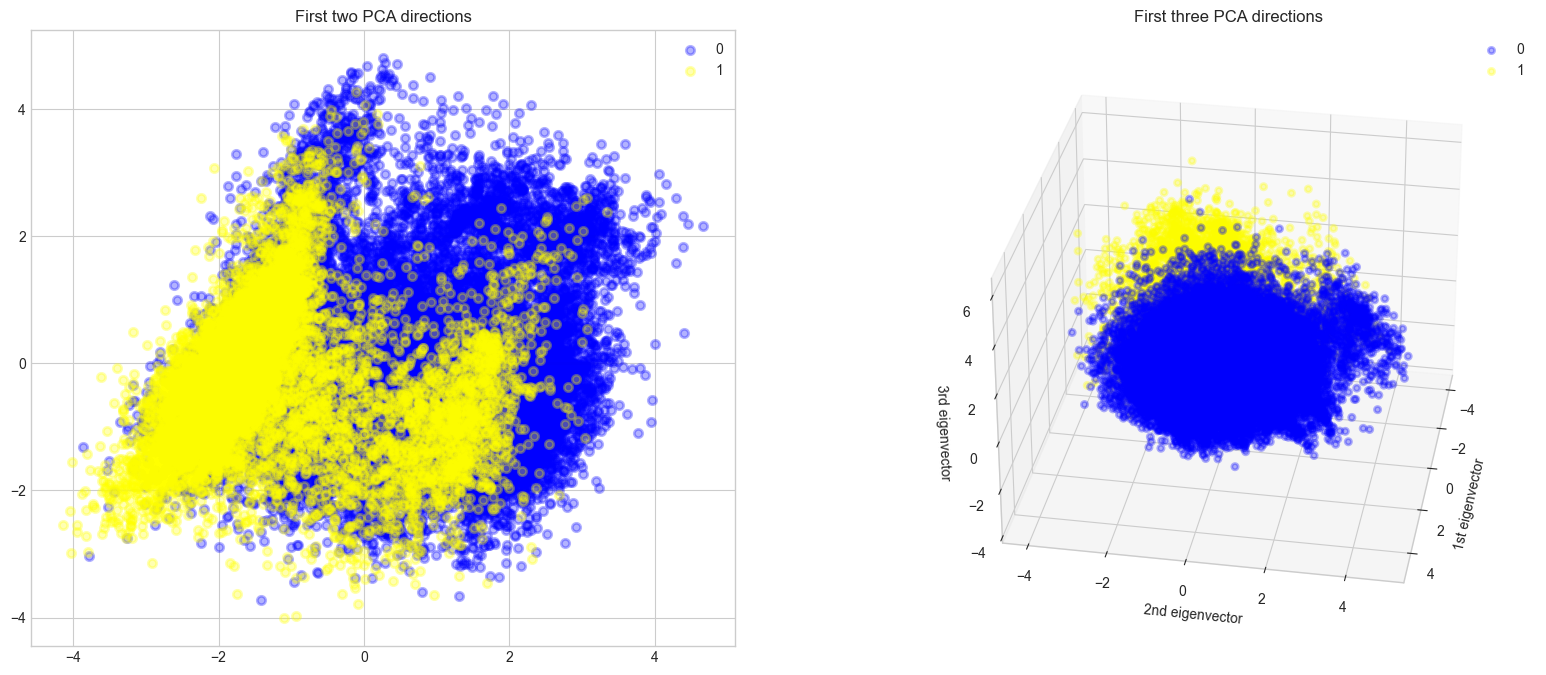

In [1003]:
std_scale = StandardScaler().fit(X)
X = std_scale.transform(X)

target_names = [0,1]
colors = ["blue", "yellow"]
lw = 2
alpha = 0.3

# 2 Components PCA
plt.figure(2, figsize=(20,8))
plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
X_red_2d = pca.fit(X).transform(X)

for color, target in zip(colors,target_names):
    plt.scatter(X_red_2d[y==target,0],X_red_2d[y==target,1],color=color,alpha=alpha,lw=lw,label=target)

plt.legend(loc="best",shadow=False,scatterpoints=1)
plt.title("First two PCA directions")

# 3 Components PCA
ax = plt.subplot(1,2,2,projection="3d")
pca = PCA(n_components=3)
X_red_3d = pca.fit(X).transform(X)

for color, target in zip(colors,target_names):
    ax.scatter(X_red_3d[y==target,0],X_red_3d[y==target,1],X_red_3d[y==target,2],
               color=color,alpha=alpha,lw=lw,label=target)

plt.legend(loc="best", shadow=False, scatterpoints=1)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

# Rotate the axes
ax.view_init(30,10)

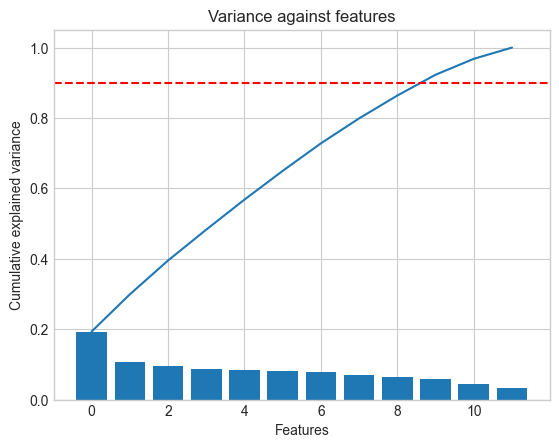

In [1004]:
# Re-define X and y
drop_elements = ["education","native-country","predclass","age_bin","hours-per-week_bin"]
X = df.drop(drop_elements,axis=1)
y = df["predclass"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Scale
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

pca = PCA()
x_train_pca = pca.fit_transform(X_train_std)
a = pca.explained_variance_ratio_
a_cumsum = a.cumsum()

plt.plot(np.arange(12),a_cumsum)
plt.bar(np.arange(12),a)
plt.axhline(0.9,color="red",linestyle="--")
plt.xlabel("Features")
plt.ylabel("Cumulative explained variance")
plt.title("Variance against features")
plt.show()

**NOTE:**
    
- Feature reduction with PCA will be ignored as there are only 12 features and none of them have a negligible variance.

### Classification Models

#### Logistic Regression

In [1005]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
score_logreg = logreg.score(X_test,y_test)
print("The accuracy of the Logistic Regression is",score_logreg)

The accuracy of the Logistic Regression is 0.7962944006551336


In [1006]:
logreg = LogisticRegression()
logreg.fit(X_train_std,y_train)
score_logreg = logreg.score(X_test_std,y_test)
print("The accuracy of the scaled Logistic Regression is",score_logreg)

The accuracy of the scaled Logistic Regression is 0.8355000511823114


#### Random Forest

In [1007]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train,y_train)
score_randomforest = randomforest.score(X_test,y_test)
print("The accuracy of the Random Forest Model is",score_randomforest)

The accuracy of the Random Forest Model is 0.8556658818712253


In [1008]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train_std,y_train)
score_randomforest = randomforest.score(X_test_std,y_test)
print("The accuracy of the scaled Random Forest Model is",score_randomforest)

The accuracy of the scaled Random Forest Model is 0.8559729757395844


#### K-Nearest Neighbors

In [1009]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
score_knn = knn.score(X_test,y_test)
print("The accuracy of the KNN Model is",score_knn)

The accuracy of the KNN Model is 0.7783805916675197


In [1010]:
knn = KNeighborsClassifier()
knn.fit(X_train_std,y_train)
score_knn = knn.score(X_test_std,y_test)
print("The accuracy of the scaled KNN Model is",score_knn)

The accuracy of the scaled KNN Model is 0.8399017299621251


## Conclusions, Lingering Issues, Further Steps

**Note:**
* The most accurate model was the Random Forest model.
* PCA was ignored as there are only 12 features and none of them have a negligible variance.
* Scaled/normalized models performed better at classification in section 6.4.

**Lingering Issues:**
* All models in section 6.4 were created using default parameters. No cross validation was done.
* The dataset is from 1994 and will be outdated.
* Pairplots take a significan time to run.

**Further Steps To Consider:**
* Look to see if more information/features can be obtained eg state/region within country
* Lookt to see if more classes can be provided for prediction/target eg "<\\$ 10k",">\\$ 200k",">\\$ 10M" etc
* Look to perform cross validation with GridsearchCV and cross_val_score
* Ask questions around intra-class analysis eg "Among all those with Phd's, do white men make more money than black women?"
